This code is adapted from https://github.com/ZhaozhiQIAN/D-CODE-ICLR-2022/

In [1]:
import pandas as pds
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline, interp1d
from scipy.linalg import svd

In [2]:
file_list = [
    "input celgene09.csv",
    "input centoco06.csv",
    "input cougar06.csv",
    "input novacea06.csv",
    "input pfizer08.csv",
    "input sanfi00.csv",
    "input sanofi79.csv",
    "inputS83OFF.csv",
    "inputS83ON.csv",
]

In [4]:
df_list = list()
for f in file_list:
    df = pds.read_csv("data/tumor/" + f)
    df["name"] = df["name"].astype(str) + f
    df_list.append(df)

df = pds.concat(df_list)

In [5]:
df.head()

,name,date,size
0,1input celgene09.csv,11.0,45.2
1,1input celgene09.csv,35.0,69.0
2,1input celgene09.csv,58.0,74.9
3,1input celgene09.csv,79.0,58.4
4,1input celgene09.csv,86.0,59.9


In [6]:
df_wide = pds.pivot_table(df, values="size", index="name", columns="date")

In [7]:
df_wide.shape

(3216, 975)

In [8]:
df_wide.head()

date,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,1267.0,1287.0,1298.0,1313.0,1321.0,1337.0,1349.0,1354.0,1411.0,1475.0
name,,,,,,,,,,,,,,,,,,,,,
10003input novacea06.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004input novacea06.csv,NaN,NaN,NaN,NaN,NaN,30.79,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10005input novacea06.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10008input novacea06.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10009input novacea06.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164.51,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
(df_wide.isnull().sum(axis=0) < (3216 - 2)).values[:365]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [10]:
mat_wide = df_wide.values[:, :365].copy()
mat_wide.shape

(3216, 365)

In [11]:
mat_wide.shape

(3216, 365)

In [12]:
((365 - np.sum(np.isnan(mat_wide), axis=1)) > 10).sum()

599

In [13]:
mat_small = mat_wide[((365 - np.sum(np.isnan(mat_wide), axis=1)) > 10)]

In [14]:
mat_small.shape

(599, 365)

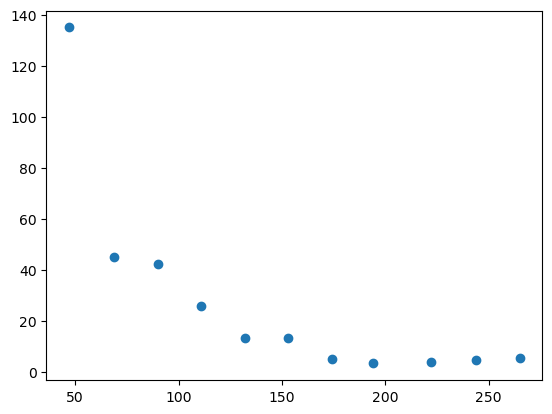

In [25]:
plt.plot(mat_small[10], "o")

In [26]:
## scipy cubic spline interpolate

interp_list = []
for i in range(mat_small.shape[0]):

    row = mat_small[i]
    ind = np.where(~np.isnan(row))[0]
    val = row[~np.isnan(row)]

    #     cs = CubicSpline(ind, val, axis=0, bc_type='natural', extrapolate=None)
    cs = interp1d(ind, val, axis=0, kind="linear", fill_value="extrapolate")

    y_interp = cs(np.arange(mat_small.shape[1]))
    interp_list.append(y_interp)

In [27]:
y_interp = np.stack(interp_list, axis=0)
y_interp.shape

(599, 365)

In [28]:
np.isnan(y_interp).sum()

0

In [78]:
# interpolate
# normalize
# cluster



y_interp_normalized = y_interp / y_interp[:, 0][:, None]

# Numpy generator
gen = np.random.default_rng(0)

y_interp_normalized *= gen.uniform(1,2, size=y_interp_normalized.shape[0]).reshape(-1,1)

In [79]:
y_interp_normalized.shape

(599, 365)

In [80]:
inds = [
    0,
    1,
    2,
    9,
    10,
    12,
    13,
    16,
    20,
    23,
    24,
    31,
    35,
    39,
    41,
    42,
    52,
    54,
    59,
    61,
    63,
    65,
    67,
    69,
    72,
    73,
    75,
    78,
    81,
    82,
    83,
    84,
    87,
    88,
    91,
    92,
    93,
    95,
    99,
    101,
    103,
    104,
    106,
    108,
    112,
    114,
    115,
    116,
    117,
    125,
    126,
    129,
    130,
    132,
    133,
    134,
    138,
    139,
    141,
    143,
    144,
    145,
    146,
    147,
    148,
    150,
    154,
    156,
    157,
    159,
    162,
    165,
    166,
    167,
    168,
    170,
    175,
    176,
    178,
    179,
    182,
    187,
    190,
    191,
    192,
    199,
    202,
    204,
    211,
    213,
    214,
    216,
    217,
    218,
    219,
    223,
    224,
    225,
    226,
    227,
    228,
    229,
    230,
    233,
    235,
    239,
    241,
    244,
    245,
    247,
    250,
    252,
    254,
    256,
    257,
    258,
    260,
    262,
    264,
    265,
    266,
    268,
    269,
    270,
    272,
    275,
    276,
    277,
    278,
    279,
    280,
    281,
    282,
    284,
    286,
    289,
    290,
    291,
    295,
    297,
    299,
    301,
    303,
    305,
    306,
    307,
    308,
    312,
    315,
    316,
    317,
    321,
    322,
    323,
    325,
    326,
    327,
    329,
    331,
    333,
    334,
    340,
    346,
    347,
    348,
    351,
    352,
    357,
    359,
    365,
    366,
    367,
    368,
    369,
    370,
    371,
    372,
    374,
    376,
    377,
    378,
    379,
    380,
    383,
    384,
    385,
    386,
    387,
    388,
    389,
    390,
    393,
    394,
    395,
    396,
    397,
    399,
    401,
    405,
    407,
    410,
    412,
    413,
    417,
    421,
    422,
    425,
    427,
    430,
    431,
    432,
    435,
    439,
    441,
    442,
    445,
    446,
    447,
    450,
    452,
    454,
    455,
    456,
    457,
    458,
    459,
    460,
    461,
    462,
    463,
    465,
    466,
    469,
    470,
    473,
    474,
    475,
    479,
    484,
    485,
    486,
    488,
    489,
    490,
    491,
    492,
    494,
    496,
    497,
    500,
    502,
    503,
    504,
    505,
    509,
    510,
    512,
    513,
    514,
    515,
    516,
    517,
    518,
    519,
    520,
    523,
    524,
    525,
    526,
    528,
    529,
    531,
    534,
    535,
    536,
    537,
    539,
    540,
    541,
    542,
    543,
    544,
    545,
    546,
    547,
    550,
    552,
    553,
    555,
    556,
    557,
    559,
    561,
    563,
    564,
    568,
    569,
    570,
    576,
    578,
    580,
    581,
    582,
    583,
    585,
    586,
    588,
    593,
    594,
    597,
]

In [81]:
y_c1 = y_interp_normalized[inds]

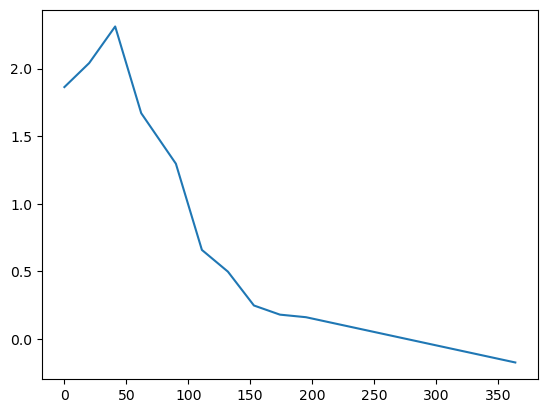

In [85]:
plt.plot(y_c1[7].T)

In [96]:
# Sample 20 measurement
measurement_indices = np.linspace(0,364,20).astype(int)

In [97]:
measurement_indices

array([  0,  19,  38,  57,  76,  95, 114, 134, 153, 172, 191, 210, 229,
       249, 268, 287, 306, 325, 344, 364])

In [98]:
y_final = y_c1[:, measurement_indices]

In [99]:
y_final.shape

(310, 20)

In [104]:
ts = np.tile(measurement_indices, (y_final.shape[0],1))

In [106]:
ts.shape

(310, 20)

In [113]:
ts = ts/365

In [107]:
x0 = y_final[:,[0]]

In [109]:
x0.shape

(310, 1)

In [114]:
ts

array([[0.        , 0.05205479, 0.10410959, ..., 0.89041096, 0.94246575,
        0.99726027],
       [0.        , 0.05205479, 0.10410959, ..., 0.89041096, 0.94246575,
        0.99726027],
       [0.        , 0.05205479, 0.10410959, ..., 0.89041096, 0.94246575,
        0.99726027],
       ...,
       [0.        , 0.05205479, 0.10410959, ..., 0.89041096, 0.94246575,
        0.99726027],
       [0.        , 0.05205479, 0.10410959, ..., 0.89041096, 0.94246575,
        0.99726027],
       [0.        , 0.05205479, 0.10410959, ..., 0.89041096, 0.94246575,
        0.99726027]])

In [115]:
dataset = {
    "xs": x0,
    "ys": y_final,
    "ts": ts,
}

In [ ]:
import pickle

with open("tumor.pkl", "wb") as f:
    pickle.dump(dataset, f)